In [20]:
import pandas as pd
%matplotlib inline
import matplotlib as plt

In [11]:
df = pd.read_csv('2.csv')
df.head()

,x,Curve1,Curve2,Curve1-1,Curve1-2,Curve1-3
0,40.423,1.6084,NaN,NaN,NaN,NaN
1,44.883,1.5734,NaN,NaN,NaN,NaN
2,49.681,1.5385,NaN,NaN,NaN,NaN
3,54.281,1.4336,NaN,NaN,NaN,NaN
4,59.557,1.3287,NaN,NaN,NaN,NaN


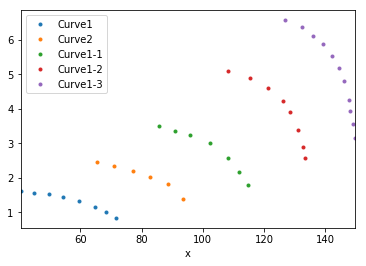

In [17]:
df.plot(style = '.')

In [27]:
df1 = df.sum(axis = 'columns')
df1.head()

x
40.423    1.6084
44.883    1.5734
49.681    1.5385
54.281    1.4336
59.557    1.3287
dtype: float64

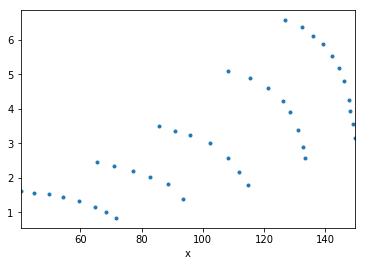

In [26]:
df1.plot(style = '.')

In [28]:
from sklearn.cluster import KMeans

In [30]:
?KMeans

In [34]:
kmeans = KMeans(n_clusters=5).fit(df1.reset_index().values)

In [35]:
kmeans.labels_

array([4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [39]:
dfclustered = df1.copy(deep = True)
dfclustered = dfclustered.to_frame()
dfclustered.head()

,0
x,
40.423,1.6084
44.883,1.5734
49.681,1.5385
54.281,1.4336
59.557,1.3287


In [41]:
dfclustered['KMeans'] = kmeans.labels_
dfclustered.head()

,0,KMeans
x,,
40.423,1.6084,4
44.883,1.5734,4
49.681,1.5385,4
54.281,1.4336,4
59.557,1.3287,0


In [45]:
dfclustered.columns = ['y', 'KMeans']

In [46]:
dfclustered.head()


,y,KMeans
x,,
40.423,1.6084,4
44.883,1.5734,4
49.681,1.5385,4
54.281,1.4336,4
59.557,1.3287,0


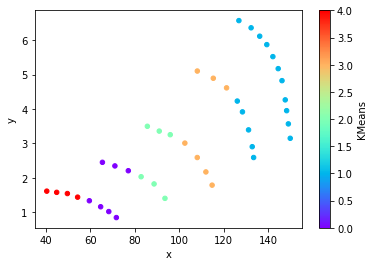

In [48]:
dfclustered.reset_index().plot(kind='scatter', x = 'x', y = 'y', c = 'KMeans', colormap = 'rainbow', sharex = False)

In [49]:
def normalize(_arr, ):
    minv, maxv = min(_arr), max(_arr)
    return (_arr - minv) / (maxv - minv)

In [50]:
dfclustered.index = normalize(dfclustered.index)
dfclustered['y'] = normalize(dfclustered['y'])

In [51]:
dfclustered

,y,KMeans
x,,
0.000000,0.134143,4
0.040775,0.128039,4
0.084640,0.121952,4
0.126695,0.103659,4
0.174930,0.085365,0
0.221346,0.054864,0
0.228568,0.280492,0
0.254779,0.030484,0
0.279884,0.262199,0


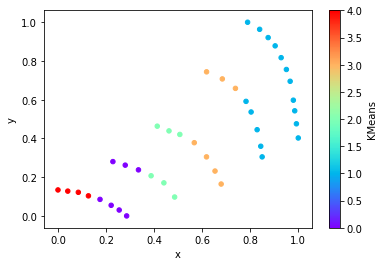

In [52]:
dfclustered.reset_index().plot(kind='scatter', x = 'x', y = 'y', c = 'KMeans', colormap = 'rainbow', sharex = False)

In [53]:
kmeans = KMeans(n_clusters=5).fit(dfclustered.drop('KMeans', axis='columns').reset_index().values)

In [ ]:
dfclustered['KMeans']